In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('../pipeline')
%load_ext autoreload
%autoreload 2

In [4]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')

In [5]:
data = pd.concat([df_train, df_test], axis=0, sort=False )

In [6]:
data = data.fillna(-1)

In [9]:
count = dict(data['userid'].value_counts())
data['count'] = data['userid'].apply(lambda x: count[x])

In [14]:
data['count'].value_counts().sort_index()

1      259504
2      138314
3       70359
4       41968
5       26210
        ...  
198       198
222       222
310       310
363       363
756       756
Name: count, Length: 114, dtype: int64

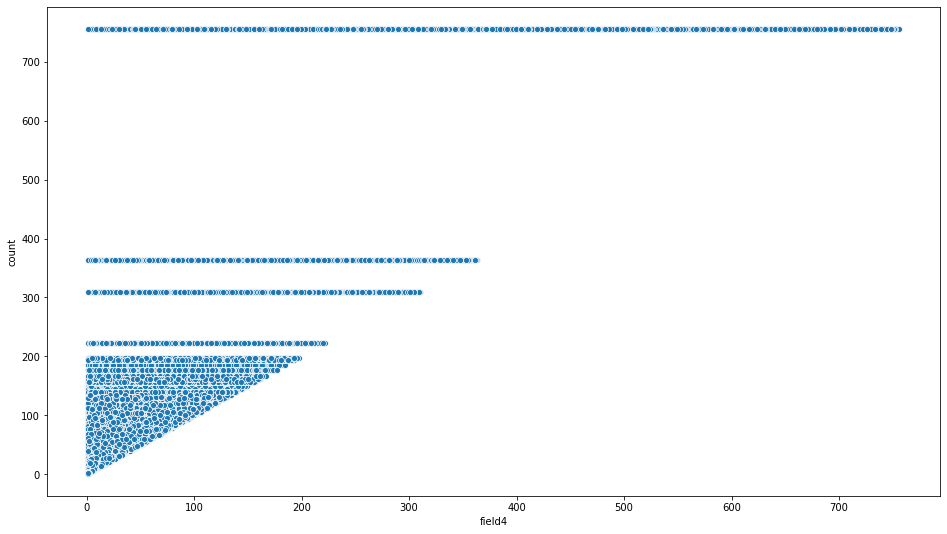

In [18]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='field4', y='count', data=data);

In [15]:
count

{'88a595f6f7754f656b33cca2c6addcb9c659c30bad00656779378af80209912a': 756,
 'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52': 363,
 'd4017f49f9e5cebdefabef5714f138ea0fc72410d19ac9997d416dc96dc01f23': 310,
 '98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b': 222,
 '2350f28919b7b4161f4e22c491cac8d5ae5347c4f52130b922651fbbb4f7381c': 198,
 'c2d39c54936961e415d536315954cf31d4a506334f65dfe96705297ca4d11a60': 193,
 'a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4': 185,
 '739eafb20f821b94d1d22146706a6c4d0375de292cd21ba3b6ba3278dc54fc93': 177,
 '6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67': 177,
 '350bc1455fa1adeef3346b956f87e23252b751efdbdec5b81d40fc8f4e5c2d2a': 167,
 '38188de7f244abad2947d65f588a7ea7818f465d9a63871fdf7fa2444318e7e1': 161,
 '4ff6d90fa7505838ff071e9a9e01208f5dfd3f5f237c74ff2e62c85a42522402': 157,
 '13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa': 149,
 'e139cfdfd8ccc2813af314294b72bcf5b2c0

In [34]:
top_users = data[data['count']>100]['userid'].value_counts()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


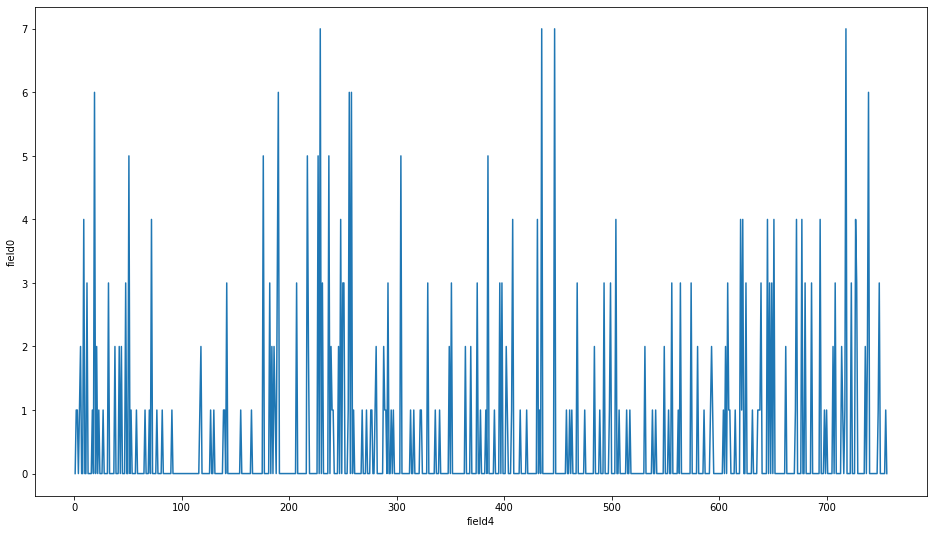

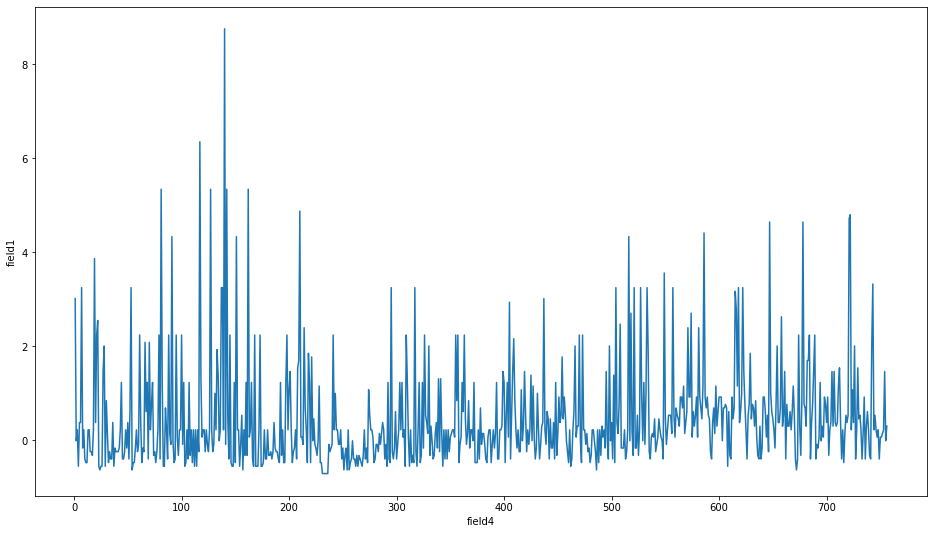

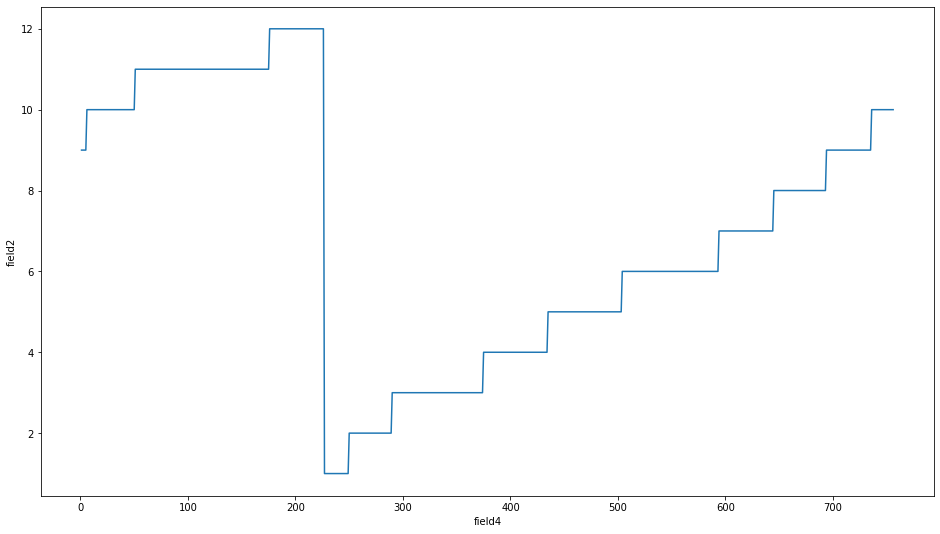

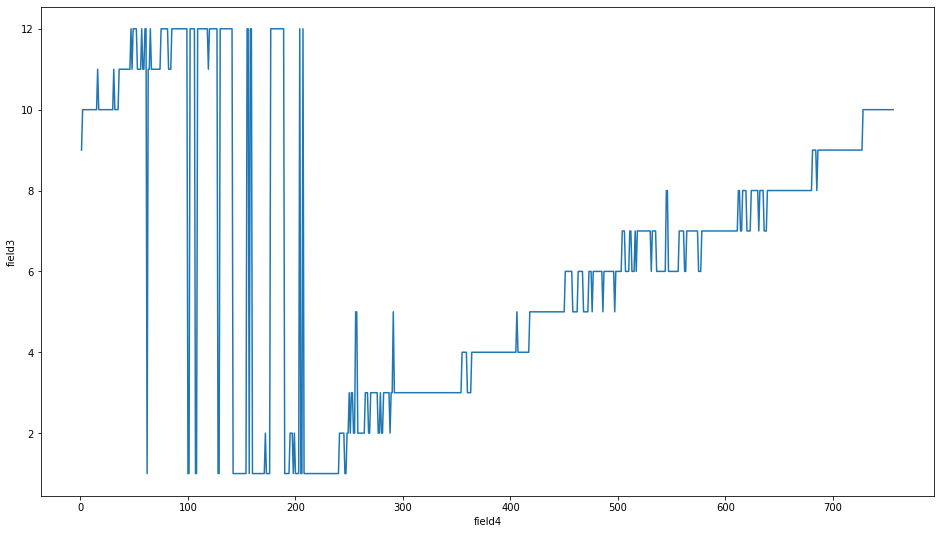

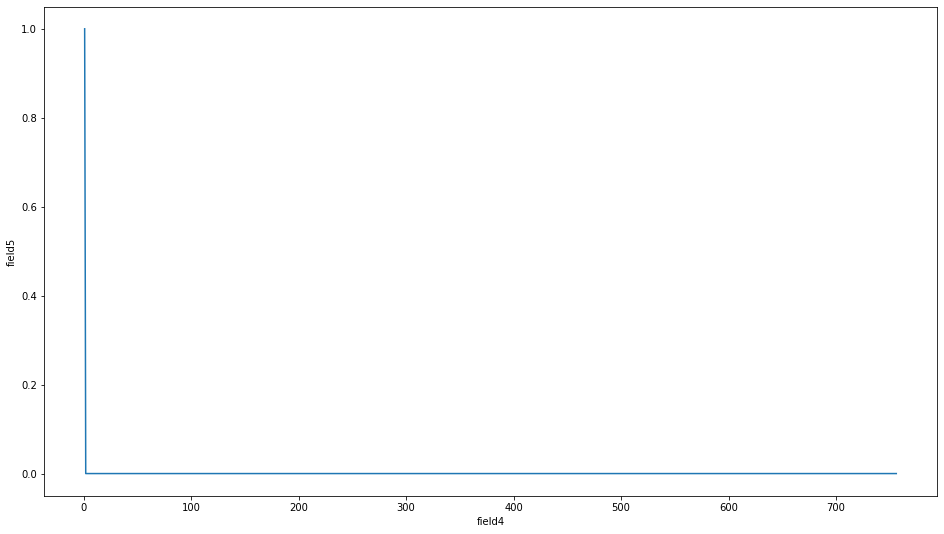

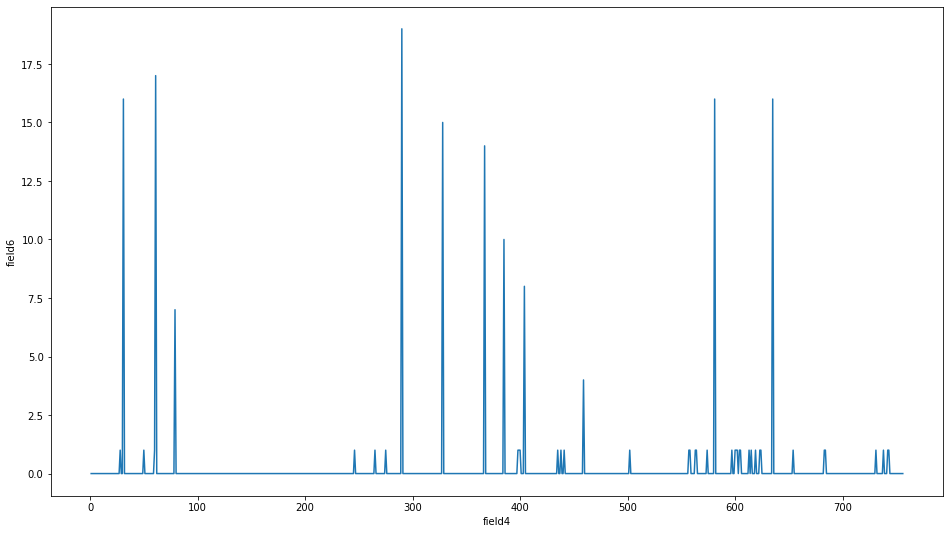

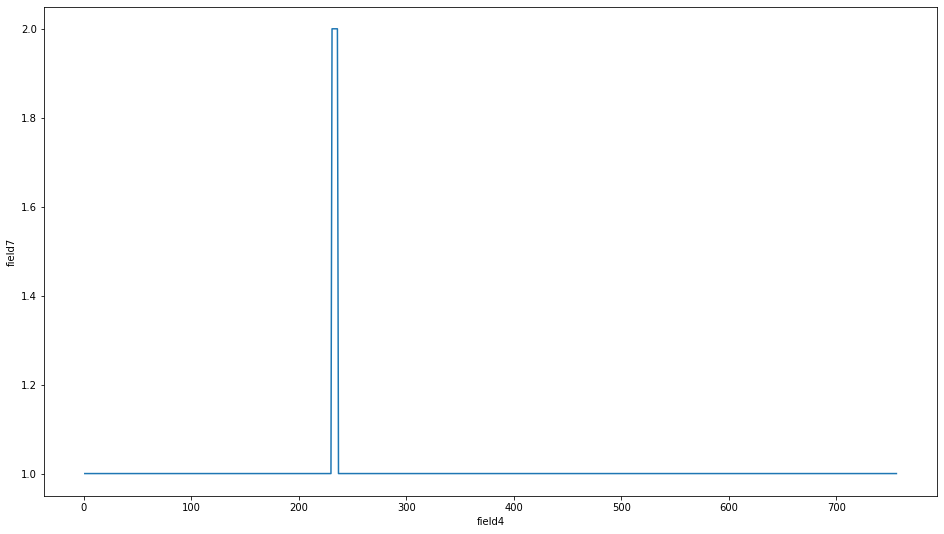

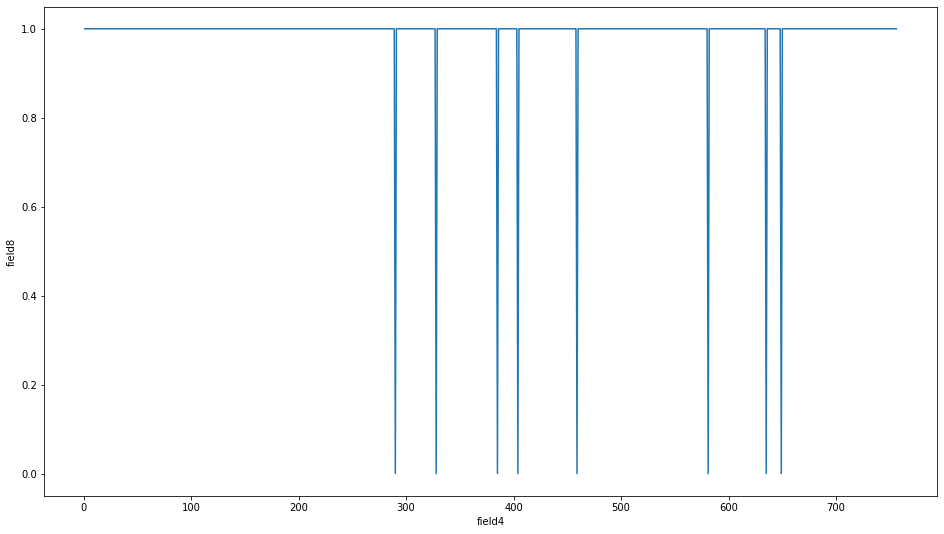

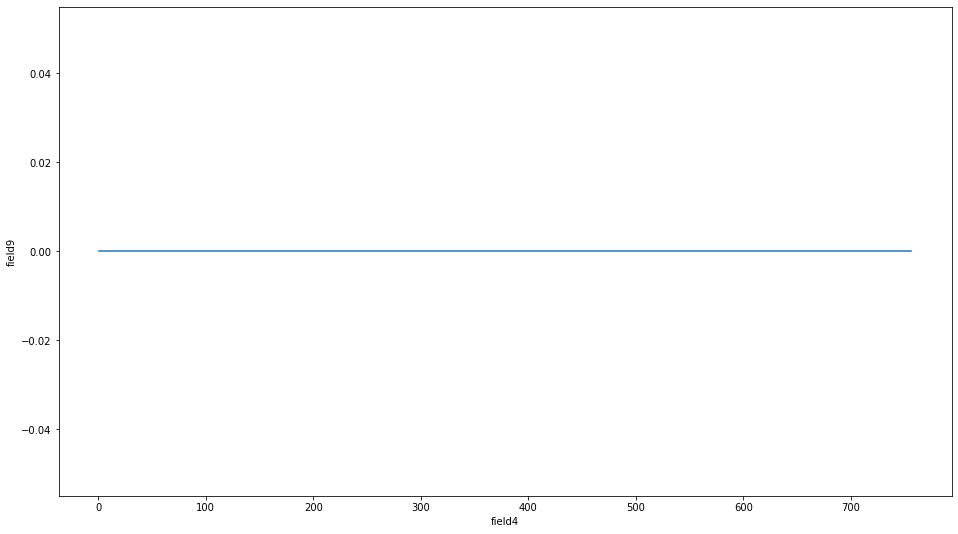

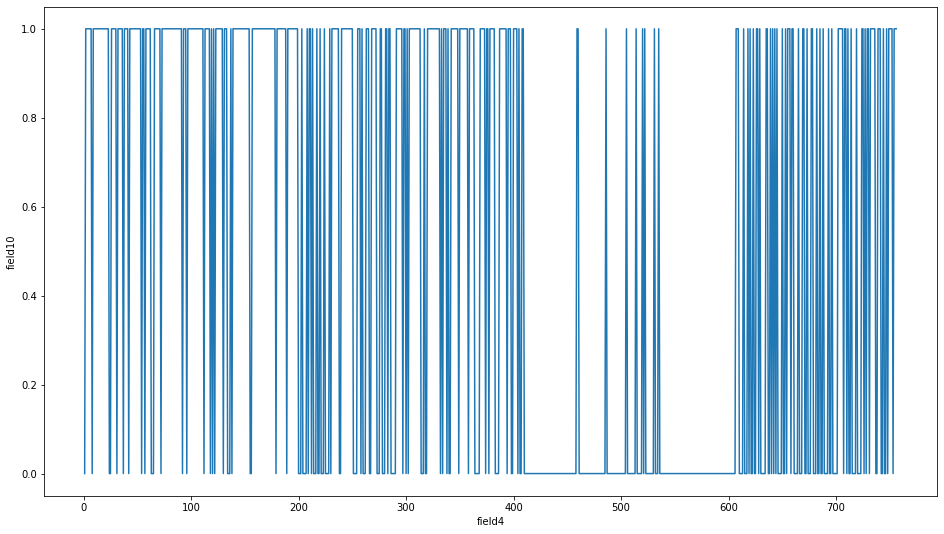

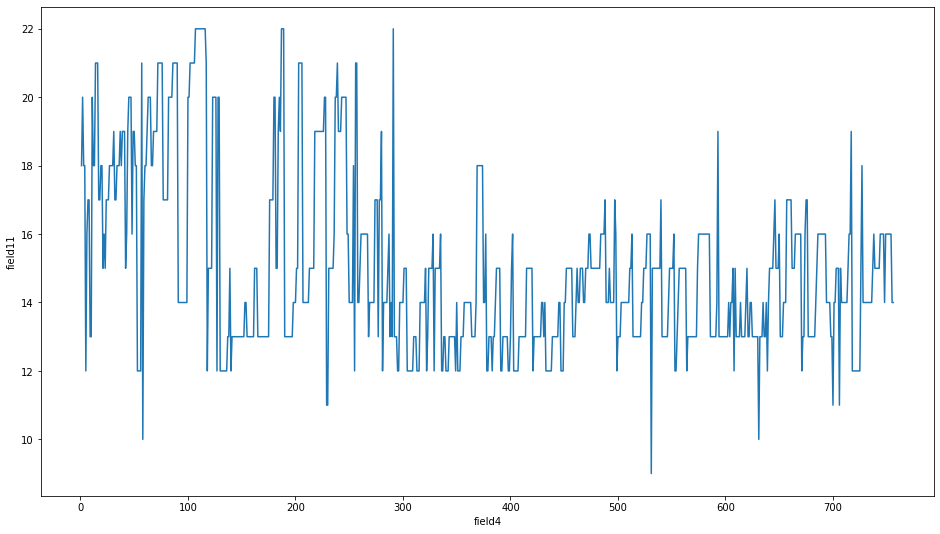

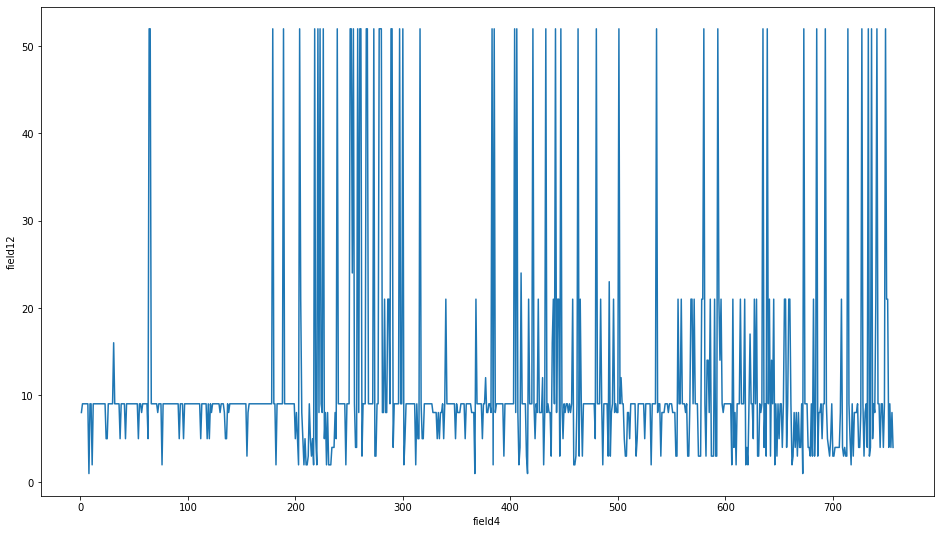

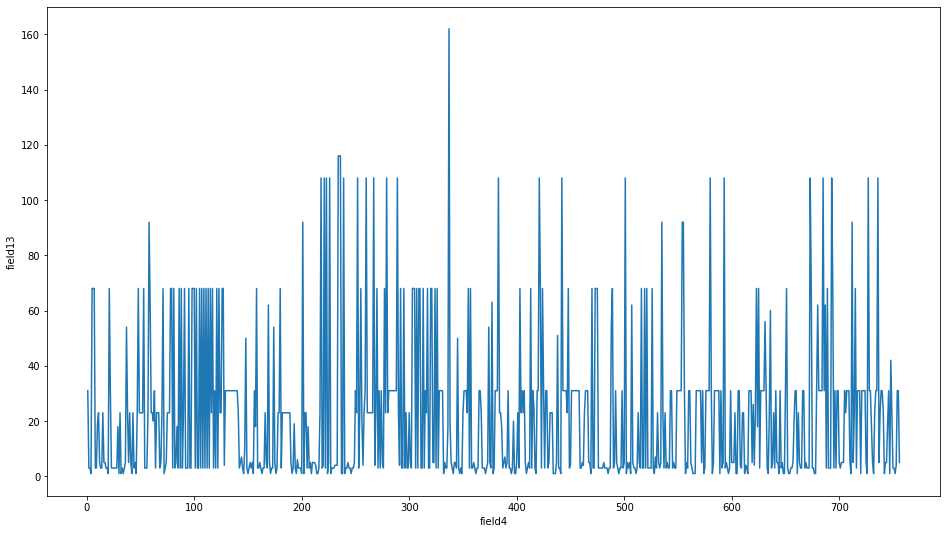

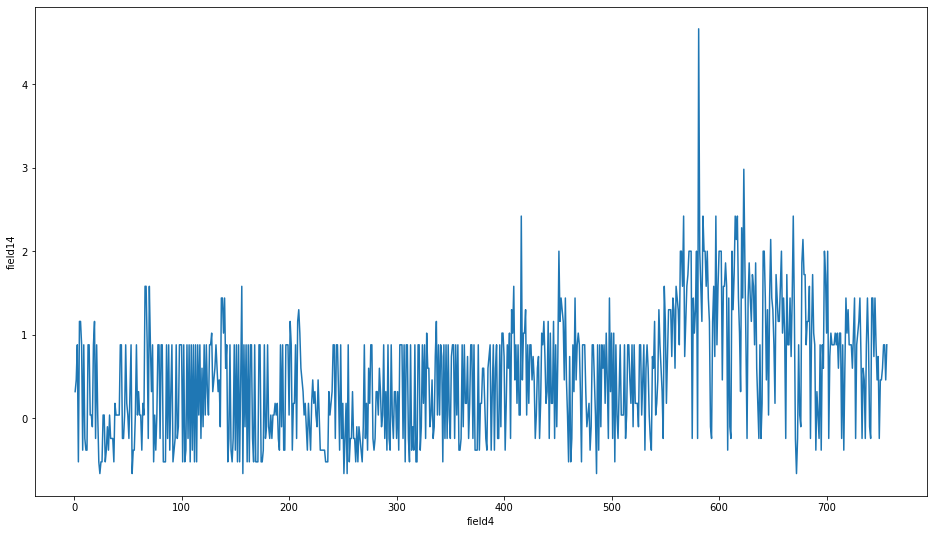

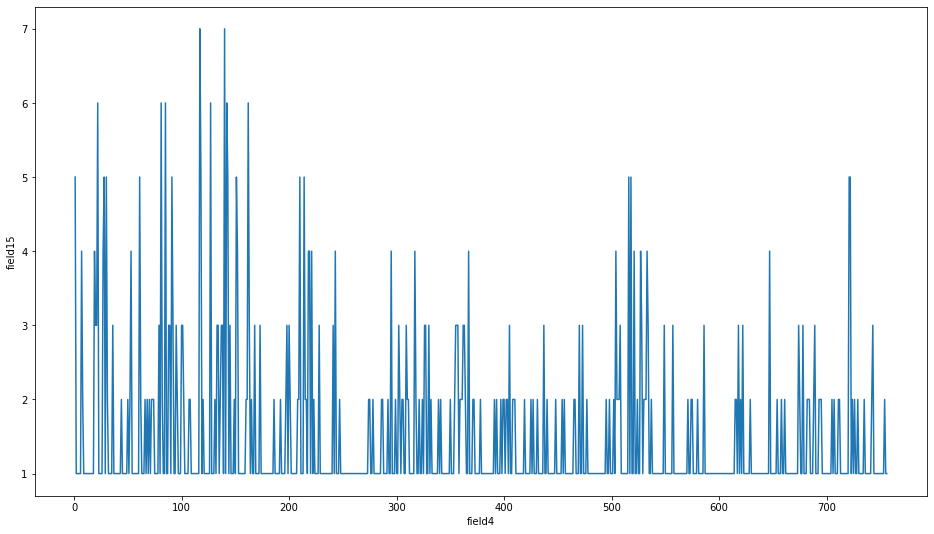

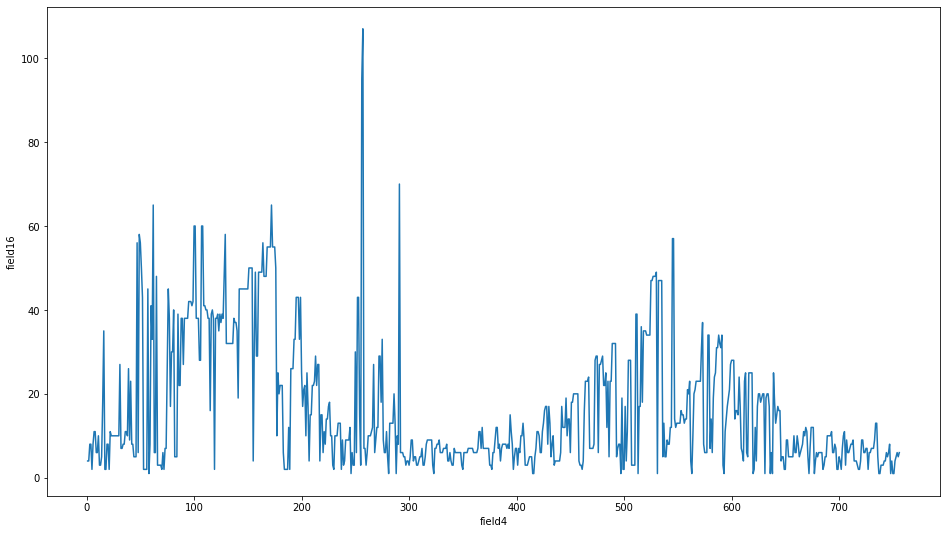

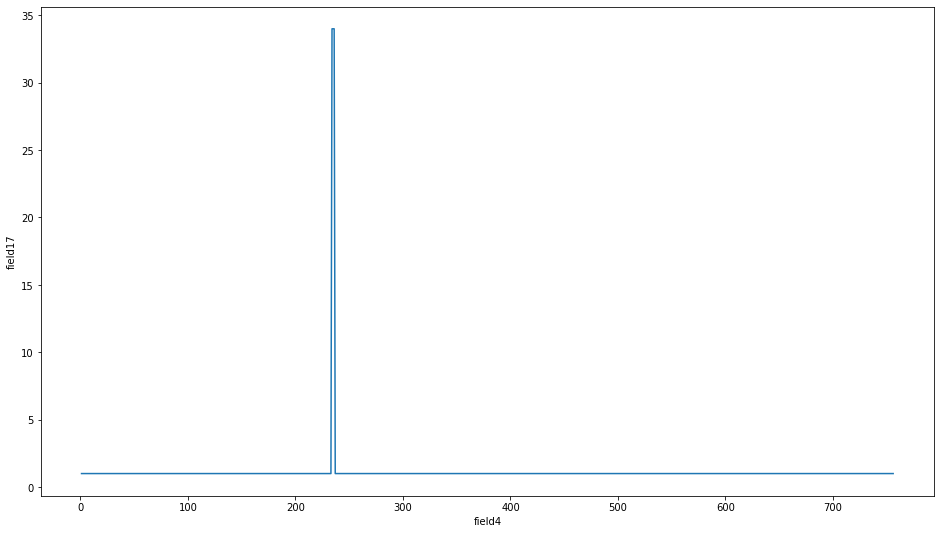

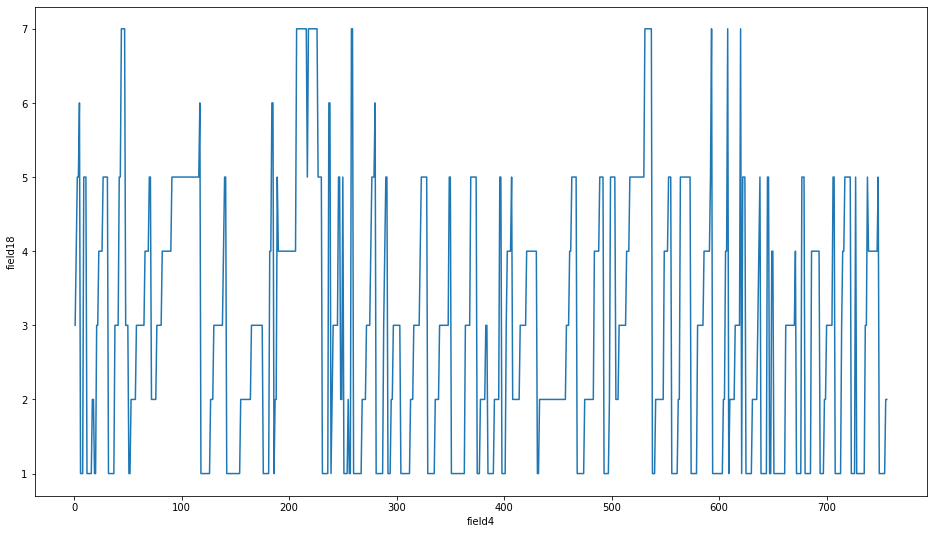

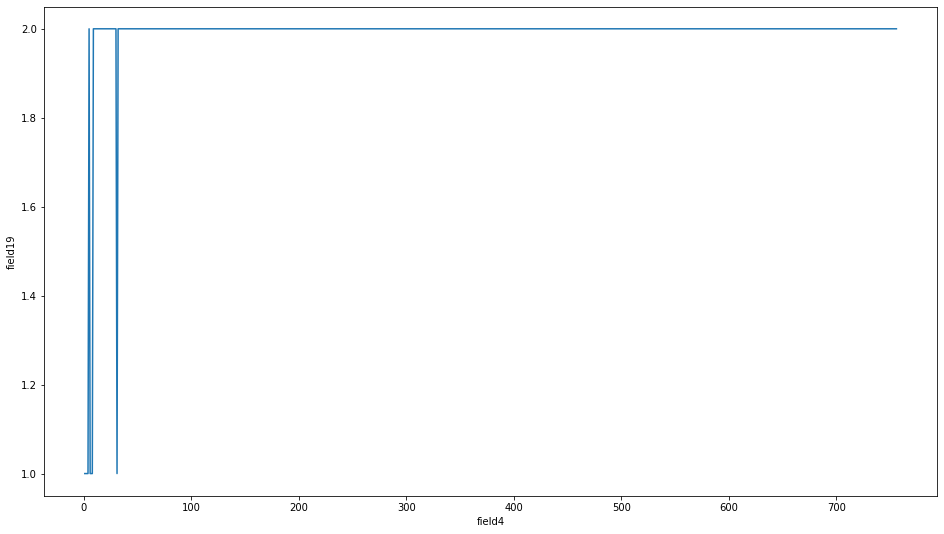

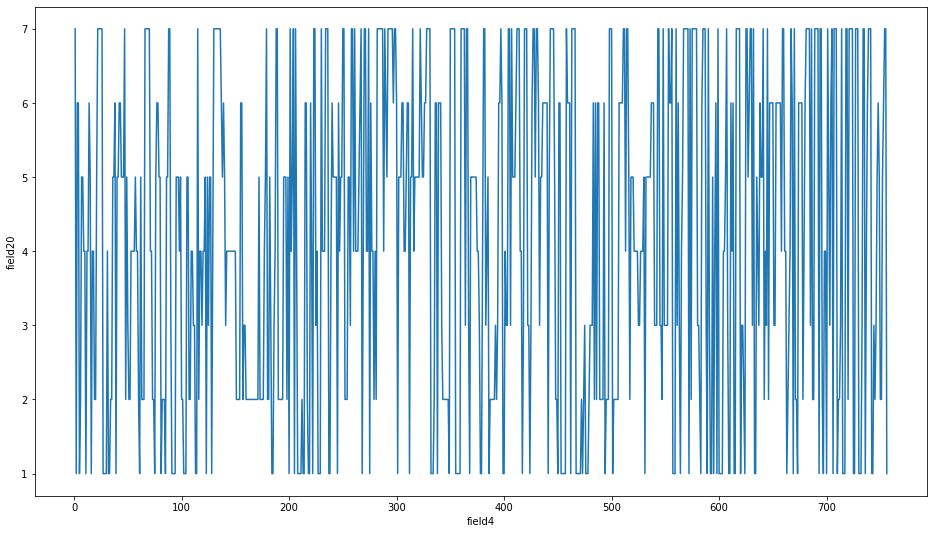

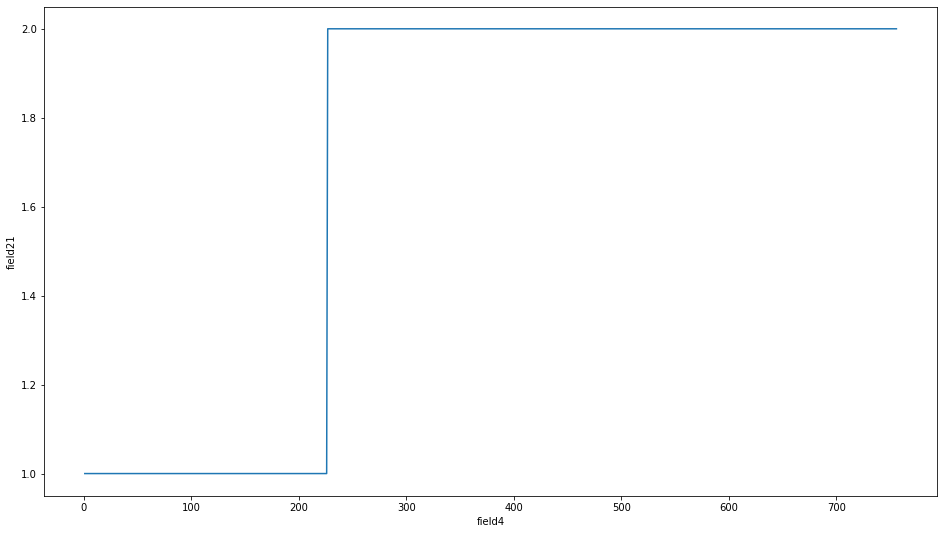

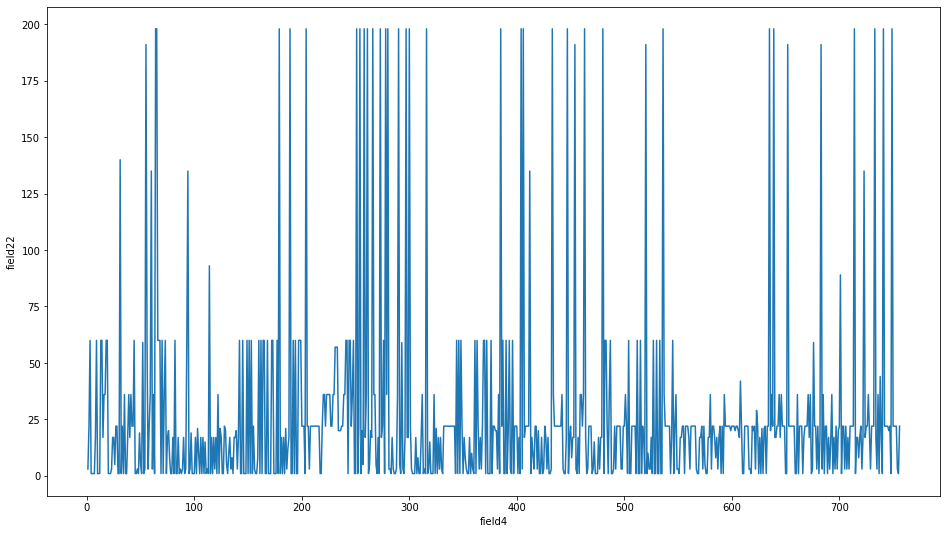

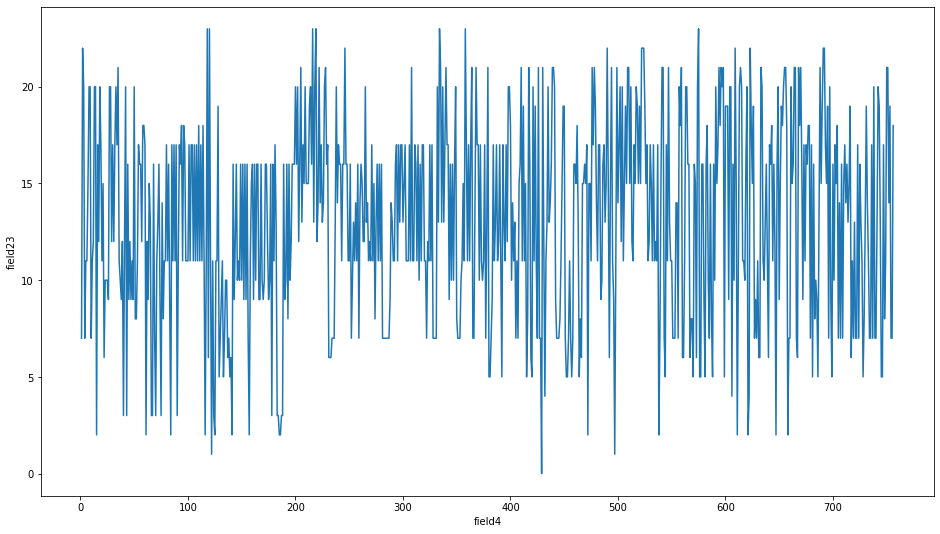

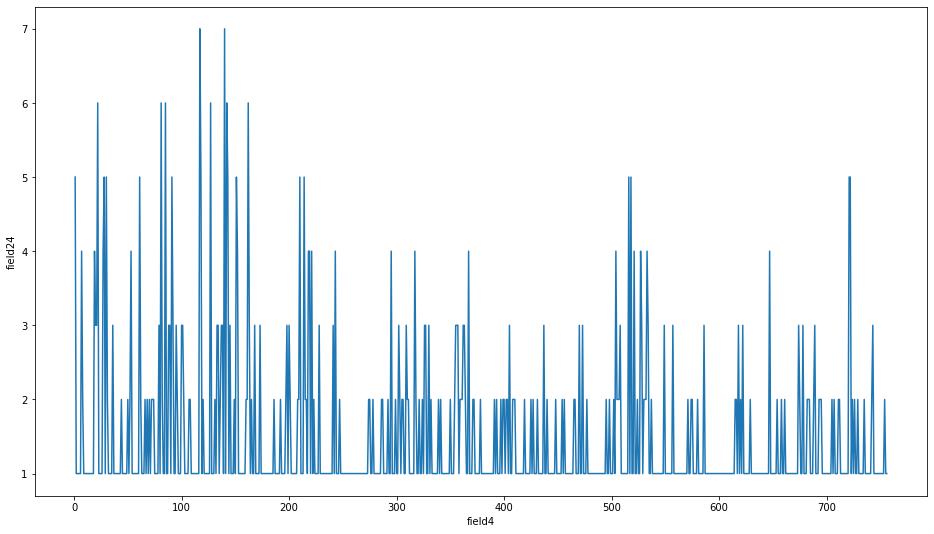

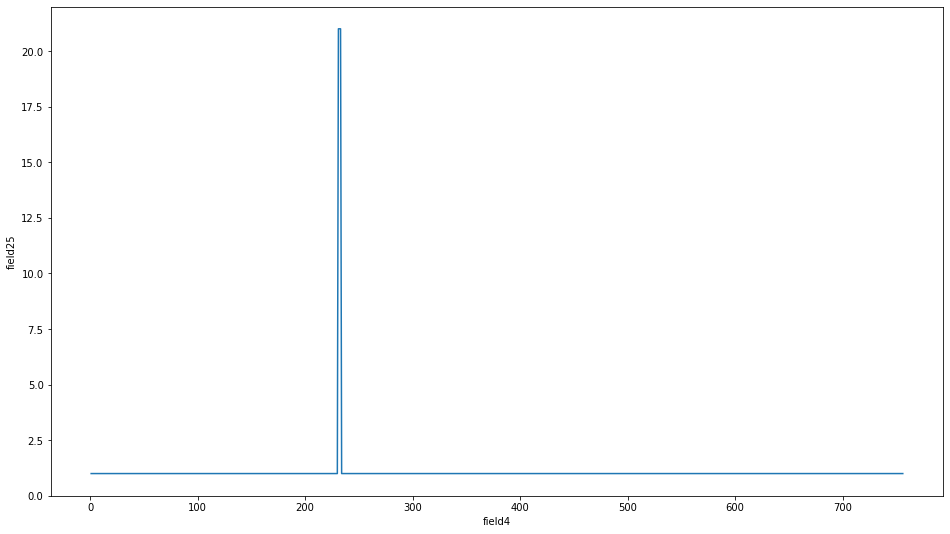

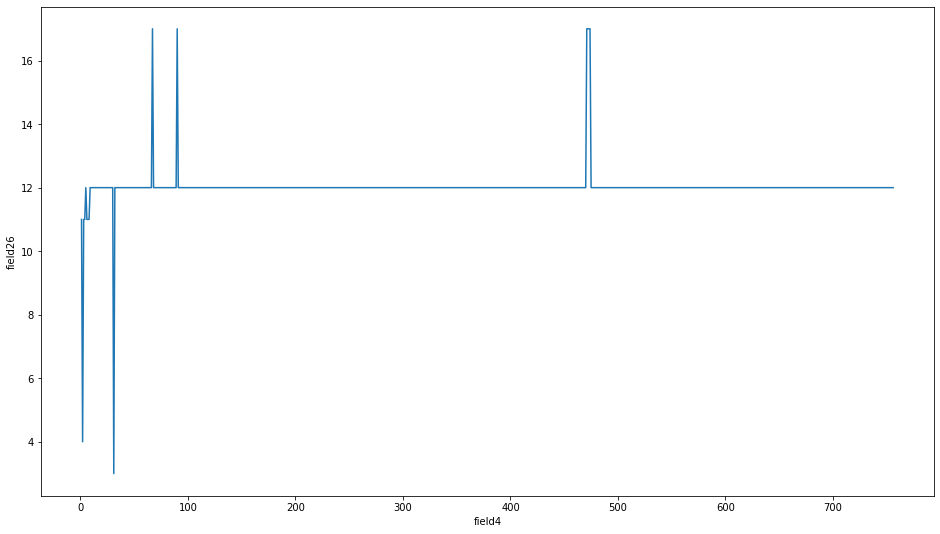

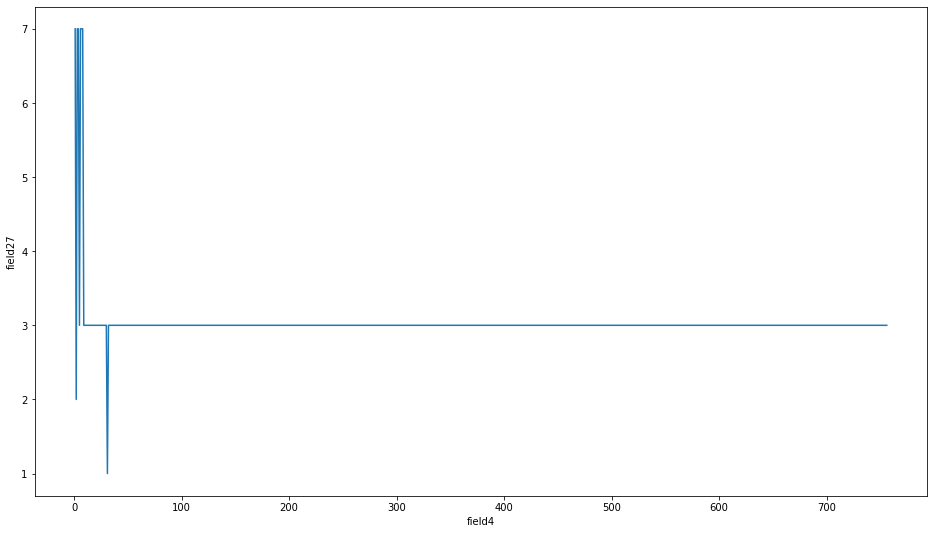

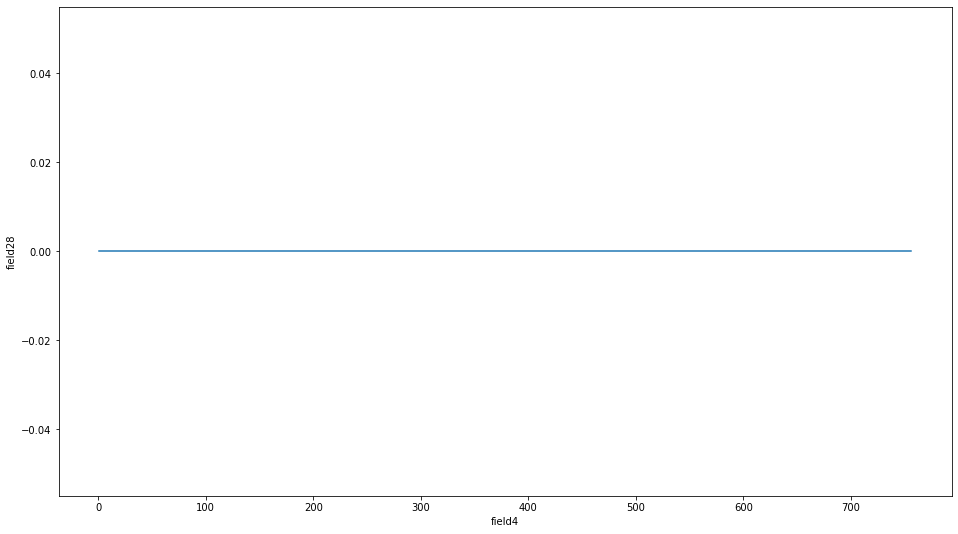

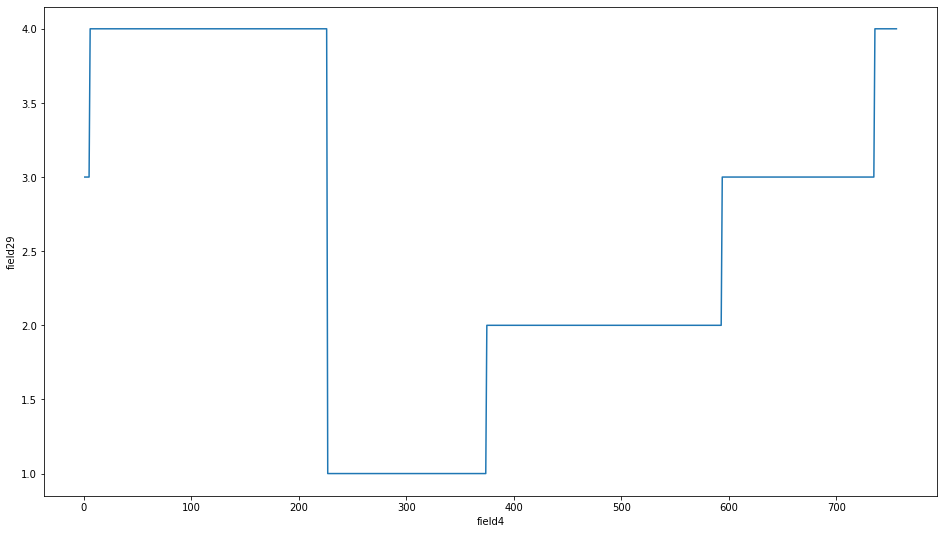

In [40]:
for target_user in top_users.index:
    sorted_oneuser = data[data.userid==target_user].sort_values('field4').set_index('field4')
    for f in [f'field{i}' for i in range(30)]:
        if f=='field4':
            continue

        plt.figure(figsize=(16,9))
        sns.lineplot(data=sorted_oneuser, x=sorted_oneuser.index,y=f)
    break

In [46]:
for target_user in top_users.index:
    sorted_oneuser = data[data.userid==target_user].sort_values('field4').set_index('field4')
#     for f in [f'field{i}' for i in range(30)]:
#         if f=='field4':
#             continue
#     f='field29'
#     plt.figure(figsize=(16,9))
#     sns.lineplot(data=sorted_oneuser, x=sorted_oneuser.index,y='field12')
#     sns.lineplot(data=sorted_oneuser, x=sorted_oneuser.index,y='field3')
    print(sorted_oneuser['field12'].value_counts())

9     398
8      84
52     52
3      52
5      47
21     42
4      34
2      30
14      4
1       4
12      3
24      2
16      2
23      1
17      1
Name: field12, dtype: int64
8      132
9      113
4       34
3       26
5       11
2       11
73       6
12       6
37       5
17       4
1        4
21       3
14       3
106      2
19       2
24       1
Name: field12, dtype: int64
9      72
2      70
3      45
4      32
5      19
8      17
16     17
24      9
58      6
17      4
14      3
19      2
1       2
43      2
88      2
91      1
33      1
12      1
51      1
52      1
60      1
69      1
152     1
Name: field12, dtype: int64
9     83
3     81
11    17
36    12
4      9
2      9
12     4
14     3
58     1
46     1
19     1
5      1
Name: field12, dtype: int64
8     45
3     32
9     28
5     24
2     13
4     13
14     8
24     7
12     5
19     4
18     4
75     3
21     3
17     2
16     1
71     1
28     1
33     1
52     1
58     1
1      1
Name: field12, dtype: int64
5      

## Field21 -- some gold-account status

In [45]:
data['field12'].value_counts().sort_index()

1       32403
2       59107
3       68540
4      116713
5       82572
        ...  
312         1
313         2
314         1
315         1
316         2
Name: field12, Length: 316, dtype: int64

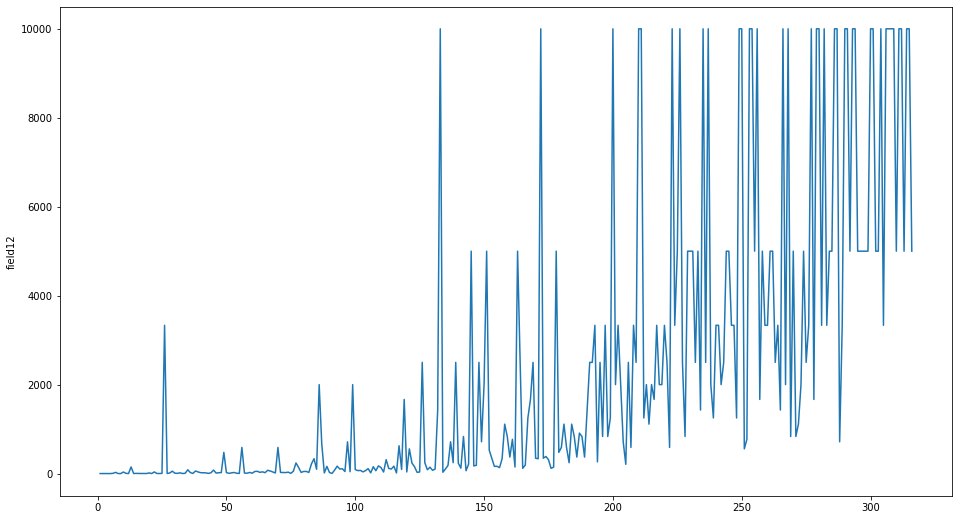

In [43]:
q = data['field12'].value_counts().sort_index()
plt.figure(figsize=(16,9))
sns.lineplot(q.index,10000/q)

In [23]:
data['field12'].value_counts().sort_index()[:20]

1      32403
2      59107
3      68540
4     116713
5      82572
6       1838
7        371
8      68554
9      57130
10       287
11      1776
12     21310
13        67
14      8932
15      2541
16      4382
17      7453
18      4370
19     15705
20       669
Name: field12, dtype: int64

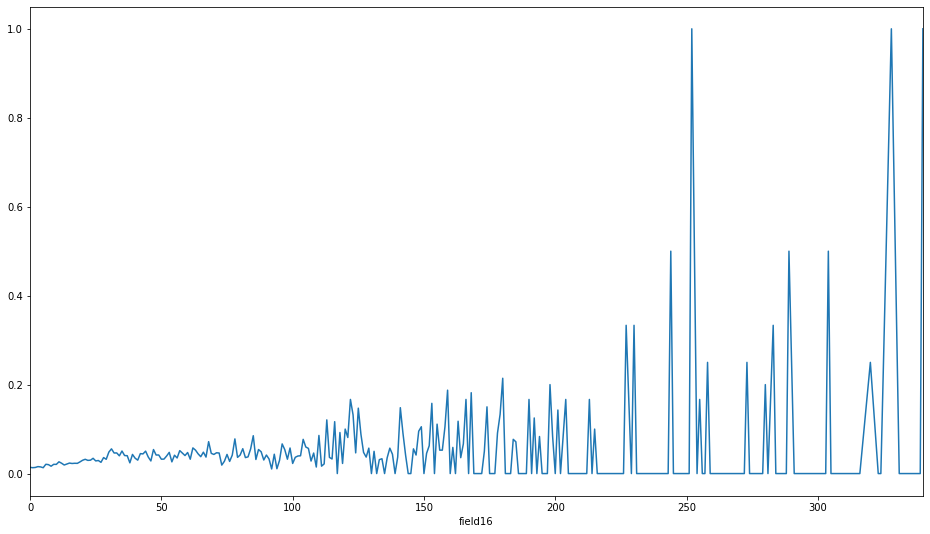

In [25]:
df_train.groupby('field16')['goal1'].agg('mean').plot(figsize=(16,9))

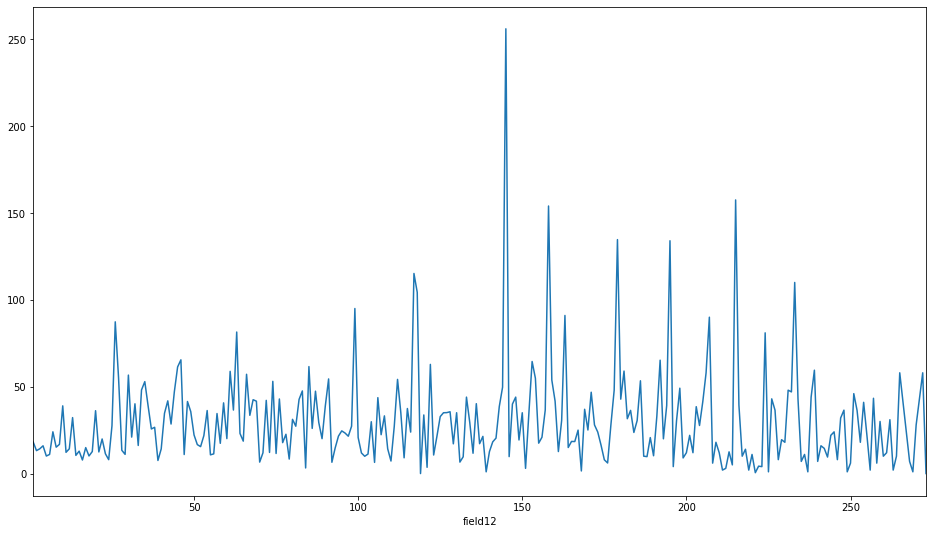

In [27]:
df_train.groupby('field12')['field16'].agg('mean').plot(figsize=(16,9))

In [9]:
data[price2_field].value_counts()

-0.521242     99056
-0.381176     89226
-0.661308     85765
-0.241109     67232
-0.101043     50935
              ...  
 25.951306        1
 27.912236        1
 41.918875        1
 16.426792        1
 25.250974        1
Name: field14, Length: 199, dtype: int64